Hypothesis: Determine how the California real estate market has been affected by the national interest rate

- L/C Price - needs to get converted to integer
- Contract Status Change Date - needs to be converted to date / time
- Convert LSqft/Ac	- convert to integer
- Seperate Bed/Bath by commas
- 

    

import pandas as pd
import numpy as np
pd.read_csv("Resources/")
real_estate_pd = pd.read_csv("Resources/California_Real_Estate_Raw_Data_Set.csv")
real_estate_pd.head()
real_estate_pd.columns
real_estate_pd['County '].astype(str).astype(int)
CA_real_estate_df = real_estate_pd
CA_real_estate_df
CA_real_estate_df = int(CA_real_estate_df)

## To do:
Interest Rates per month
Hypothesis testing
Analyze the data showing the 

# import pandas as pd
# import numpy as np
# import datetime as dt
# real_estate_pd = pd.read_csv("Resources/California_Real_Estate_Raw_Data_Set.csv")
# real_estate_pd.head()
# real_estate_pd.columns
# real_estate_pd['County '].astype(str).astype(int)
# ca_real_estate = real_estate_pd[["Listing ID","City","L/C Price","County"]]
# ca_real_estate.head()
# CA_real_estate_df = real_estate_pd
# CA_real_estate_df
# CA_real_estate_df = int(CA_real_estate_df)

In [1]:
import pandas as pd
import numpy as np
import datetime as dt

In [2]:
pd.set_option('display.max_columns', 30)

In [3]:
ca_real_estate = pd.read_csv("Resources/California_Real_Estate_Raw_Data_Set.csv")

In [4]:
ca_real_estate_df = ca_real_estate

In [5]:
ca_real_estate_df.rename(columns = {"Contract Status Change Date": "Date"}, inplace = True)

In [6]:
ca_real_estate_df.Date = pd.to_datetime(ca_real_estate_df.Date, format = "%m/%d/%y")

In [7]:
ca_real_estate_df["month"] = ca_real_estate_df.Date.dt.month

In [8]:
ca_real_estate_df[['Price Per Square Foot']] = ca_real_estate_df[['Price Per Square Foot']].replace('[\$,]','',regex=True).astype(float)

In [9]:
ca_real_estate_df.columns

Index(['Unnamed: 0', 'Listing ID', 'S', 'Sub Type', 'St#', 'St Name', 'City',
       'MLS Area', 'SLC', 'L/C Price', 'Price Per Square Foot', 'Br/Ba',
       'Sqft', 'YrBuilt', 'LSqft/Ac', 'DOM/CDOM', 'View YN', 'Pool Private YN',
       'BAC', 'Date', 'MLS', 'County ', 'month'],
      dtype='object')

In [10]:
ca_real_estate_df[['L/C Price']] = ca_real_estate_df[['L/C Price']].replace('[\$,]','',regex=True).astype(float)

In [11]:
ca_real_estate_df[["Sqft"]] = ca_real_estate_df.Sqft.str.split('/', expand=True).drop([1], axis = 1)

In [12]:
ca_real_estate_df[["YrBuilt"]] = ca_real_estate_df.YrBuilt.str.split('/', expand=True).drop([1], axis = 1)

In [13]:
ca_real_estate_df[["Bed & Bath", "A", "B", "C"]] = ca_real_estate_df['Br/Ba'].str.split(",", expand = True)
ca_real_estate_df[["Bed", "Bath"]] = ca_real_estate_df["Bed & Bath"].str.split("/", expand = True)

In [14]:
ca_real_estate_df =ca_real_estate_df.drop(columns = ['Bed & Bath'])

In [15]:
ca_real_estate_df.rename(columns = {"Sqft": "Sqft/A"}, inplace = True)
ca_real_estate_df[["LSqft", "Ac"]] = ca_real_estate_df['LSqft/Ac'].str.split('/', expand = True).replace('[\$,]','',regex=True).astype(float)


In [16]:
ca_real_estate_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22109 entries, 0 to 22108
Data columns (total 30 columns):
Unnamed: 0               22109 non-null int64
Listing ID               22109 non-null object
S                        22109 non-null object
Sub Type                 22109 non-null object
St#                      22109 non-null object
St Name                  22109 non-null object
City                     22109 non-null object
MLS Area                 20771 non-null object
SLC                      22108 non-null object
L/C Price                22109 non-null float64
Price Per Square Foot    22108 non-null float64
Br/Ba                    22109 non-null object
Sqft/A                   22109 non-null object
YrBuilt                  22109 non-null object
LSqft/Ac                 22108 non-null object
DOM/CDOM                 22109 non-null object
View YN                  22054 non-null object
Pool Private YN          22102 non-null object
BAC                      22109 non-null obje

In [17]:
ca_real_estate_sorted_df = ca_real_estate_df.sort_values(by='Date')

In [27]:
ca_real_estate_sorted_df.Date

16794   2018-08-15
15277   2018-09-10
4071    2018-11-29
13829   2019-01-07
20633   2019-01-08
20631   2019-01-08
20289   2019-01-24
22009   2019-01-30
3217    2019-02-11
13643   2019-02-15
20448   2019-02-28
4195    2019-03-08
9632    2019-03-14
19740   2019-03-15
20462   2019-03-15
18700   2019-03-27
20223   2019-04-01
20340   2019-04-02
21773   2019-04-11
11678   2019-04-12
12216   2019-04-15
20268   2019-04-18
15027   2019-04-24
19714   2019-04-26
22037   2019-04-28
20623   2019-04-29
59      2019-05-02
9039    2019-05-03
9415    2019-05-03
20675   2019-05-04
           ...    
11601   2019-10-01
13082   2019-10-01
17744   2019-10-01
9708    2019-10-01
19774   2019-10-01
9695    2019-10-01
10527   2019-10-01
21775   2019-10-01
10534   2019-10-01
13145   2019-10-01
11596   2019-10-01
11595   2019-10-01
11493   2019-10-01
9666    2019-10-01
18573   2019-10-01
11586   2019-10-01
11583   2019-10-01
13211   2019-10-01
10546   2019-10-01
9597    2019-10-01
19451   2019-10-01
13286   2019

In [24]:
ca_real_estate_sorted_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22109 entries, 16794 to 9244
Data columns (total 30 columns):
Unnamed: 0               22109 non-null int64
Listing ID               22109 non-null object
S                        22109 non-null object
Sub Type                 22109 non-null object
St#                      22109 non-null object
St Name                  22109 non-null object
City                     22109 non-null object
MLS Area                 20771 non-null object
SLC                      22108 non-null object
L/C Price                22109 non-null float64
Price Per Square Foot    22108 non-null float64
Br/Ba                    22109 non-null object
Sqft/A                   22109 non-null object
YrBuilt                  22109 non-null object
LSqft/Ac                 22108 non-null object
DOM/CDOM                 22109 non-null object
View YN                  22054 non-null object
Pool Private YN          22102 non-null object
BAC                      22109 non-null o

In [32]:
ca_real_estate_sorted_df_JM = ca_real_estate_sorted_df[(ca_real_estate_sorted_df.Date >= "2018-08-15") & (ca_real_estate_sorted_df.Date <= "2019-05-31")]

In [50]:
import datetime as dt
ca_real_estate_sorted_df.Date[(ca_real_estate_sorted_df.Date.dt.month == 9) & (ca_real_estate_sorted_df.Date.dt.year == 2019)].value_counts().sum()

10369

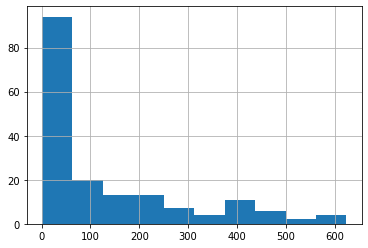

In [61]:
ca_real_estate_sorted_df['Date'].value_counts().hist()

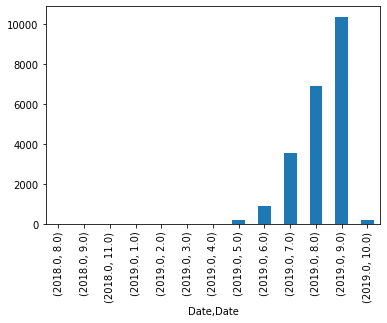

In [64]:
ca_real_estate_sorted_df['Date'].groupby([ca_real_estate_sorted_df["Date"].dt.year,ca_real_estate_sorted_df["Date"].dt.month]).count().plot(kind="bar")